In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 

In [ ]:
# 加えてやりたいこと
# dwntwn実行後はovlpが128から134に増加した
# ovlpでNoMASKになる都市とそうでない都市を判別する
# NoMASKはlndmsk問題によって発生している→修正(307)都市
# MASKは作って，CAMA推定は行わないようにするのが良いと思われる

In [2]:
def geography(one, twho, three, four):
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)  
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

In [3]:
### to be changed ###
root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'

#name of the camacity file
cmct_name = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/camacity_first.txt'

#patt for the reference file
ref_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_/city_clrd0000.gl5'


In [25]:
#list of overlapped cities

cty_dta_ = []
ovlp_list = []

with open(cmct_name, encoding="utf8") as file:
    for line in file:
        row = line.strip().split('|')
        cty_dta_.append(row)

for row in cty_dta_:
    if row[1] == 'OVERLAP':
        ovlp_list.append(int(row[0]))

print('Number of overlaped cities : ',len(ovlp_list))

Number of overlaped cities :  128


In [35]:
#removal of overlapped grids

ctycnt_path_ref = ref_path
ref = np.fromfile(ctycnt_path_ref, dtype='float32').reshape(2160, 4320)

for i in ovlp_list:
    print(f'overlap num {i} doing ---')
    
    #removing grids
    data = np.fromfile(f'{root_dir}/global_city/dat/vld_cty_/city_{i:08}.gl5', dtype='float32').reshape(2160, 4320)
    for j in range(len(data)):
        for k in range(len(data[0])):
            if data[j,k] == 1:
                if ref[j,k] != 0:
                    data[j,k] = 0
    
    #saving
    save_path = f'{root_dir}/camacity/dat/cty_msk_/city_et_{i:08}.gl5'
    data.astype(np.float32).tofile(save_path)
    print(f"{save_path} saved")

overlap num 42 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000042.gl5 saved
overlap num 43 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000043.gl5 saved
overlap num 44 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000044.gl5 saved
overlap num 122 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000122.gl5 saved
overlap num 148 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000148.gl5 saved
overlap num 158 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000158.gl5 saved
overlap num 160 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000160.gl5 saved
overlap num 206 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_00000206.gl5 saved
overlap num 227 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08

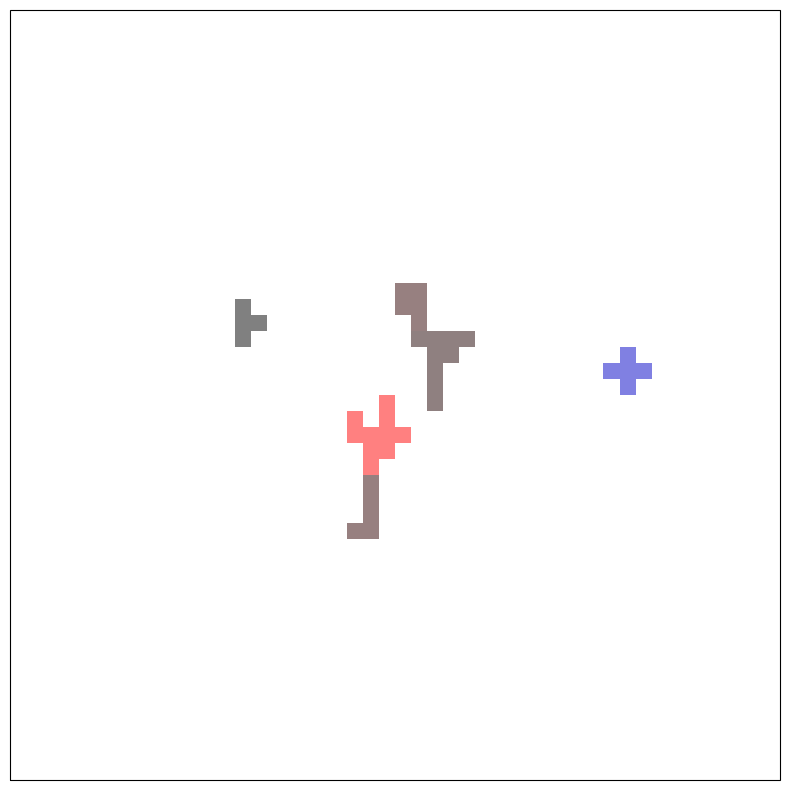

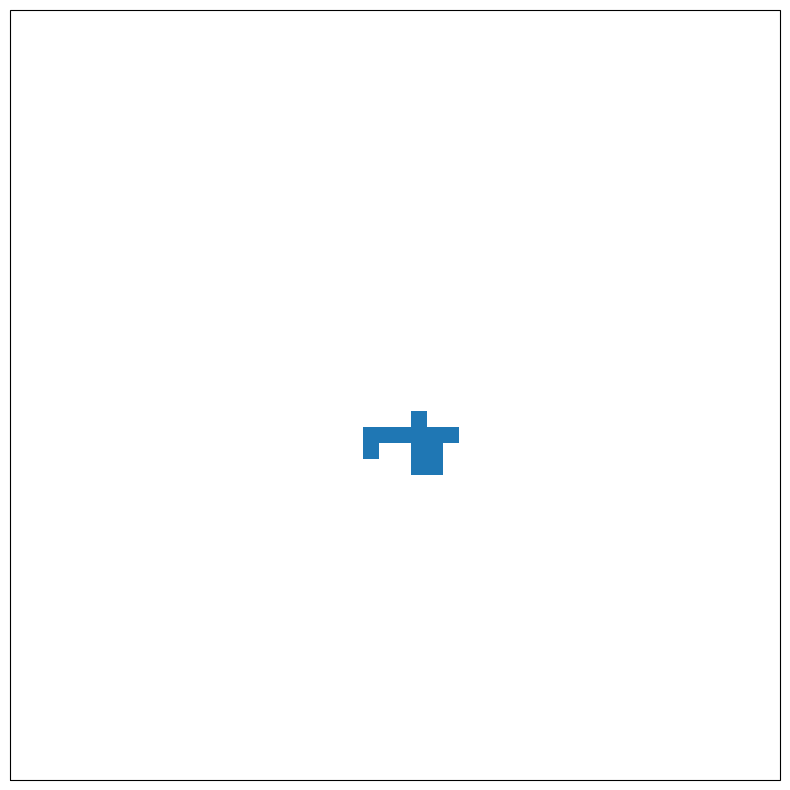

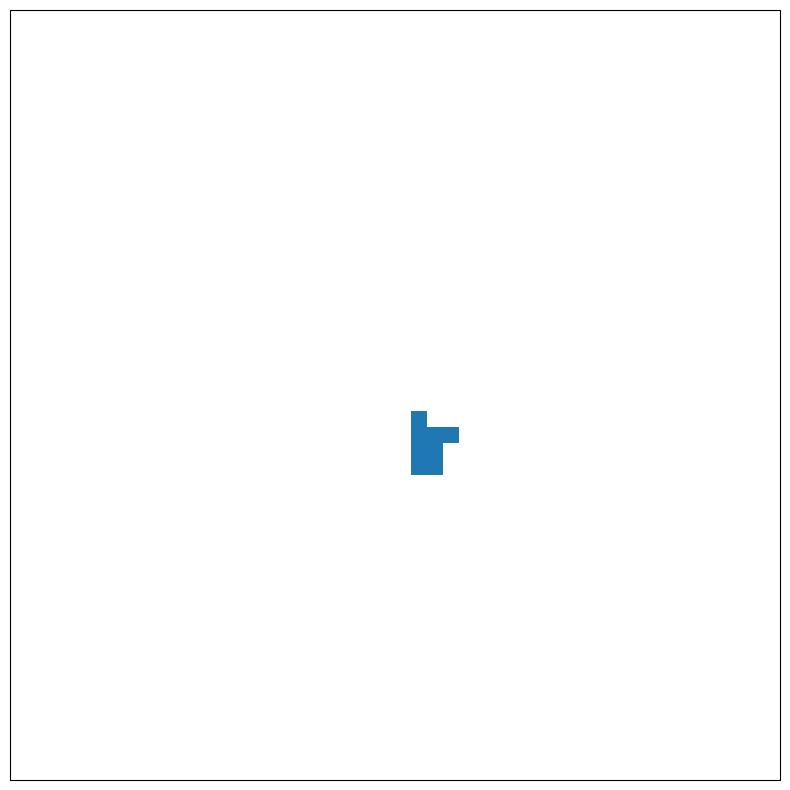

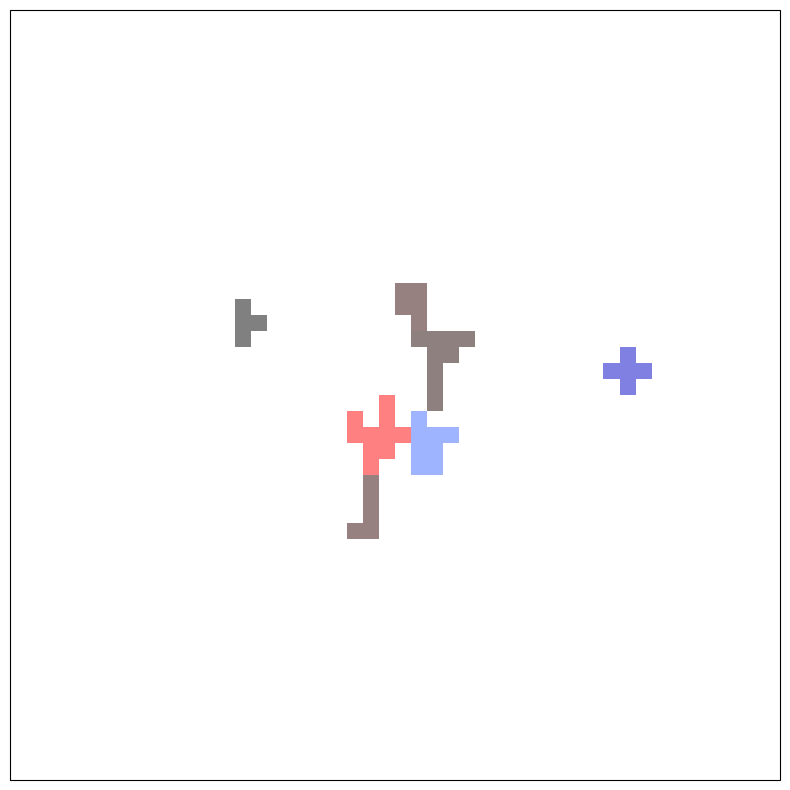

In [53]:
#drawings
city_nb = 122 #Dongguan
one = 26
two = 30
three = -28
four = -24

upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(one, two, three, four)

#ref
ref_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_/city_clrd0000.gl5'
ref = np.fromfile(ref_path, dtype='float32').reshape(2160, 4320)

ref_cropped = ref[upperindex:lowerindex, leftindex:rightindex]
ref_masked = np.ma.masked_where(ref_cropped==0, ref_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(ref_masked,
               extent=img_extent, transform=projection, cmap='flag', alpha=0.5)
ax.coastlines()
plt.show()

#before removal

ctyclr_path = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_/city_{city_nb:08}.gl5'
ctyclr_gl5 = np.fromfile(ctyclr_path, dtype='float32').reshape(2160, 4320)
ctyclr_cropped = ctyclr_gl5[upperindex:lowerindex, leftindex:rightindex]
ctyclr_masked = np.ma.masked_where(ctyclr_cropped==0, ctyclr_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(ctyclr_masked,
               extent=img_extent, transform=projection, cmap='tab20')
ax.coastlines()
plt.show()

#after removal

ctyclr_path = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_{city_nb:08}.gl5'
ctyclr_gl5 = np.fromfile(ctyclr_path, dtype='float32').reshape(2160, 4320)
ctyclr_cropped = ctyclr_gl5[upperindex:lowerindex, leftindex:rightindex]
ctyclr_masked = np.ma.masked_where(ctyclr_cropped==0, ctyclr_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(ctyclr_masked,
               extent=img_extent, transform=projection, cmap='tab20')
ax.coastlines()
plt.show()

mod = ref + ctyclr_gl5*city_nb
mod_cropped = mod[upperindex:lowerindex, leftindex:rightindex]
mod_masked = np.ma.masked_where(mod_cropped==0, mod_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(mod_masked,
               extent=img_extent, transform=projection, cmap='flag', alpha=0.5)
ax.coastlines()
plt.show()